In [2]:
import pandas as pd
import numpy as np

In [3]:
input_file = 'data/input.csv'
df = pd.read_csv(input_file)
df

,Supplier Name,Invoice Number,Part Number,Cost,Purchase Date
0,A,001-1001,2341,500000,2014-01-20
1,A,001-1002,2341,500000,2014-01-20
2,A,001-1003,5467,750000,2014-01-20
3,A,001-1004,5467,750000,2014-01-20
4,B,001-1005,7009,250000,2018-01-30
5,B,001-1006,7009,250000,2018-01-30
6,B,001-1007,6650,125000,2017-02-03
7,B,001-1008,6650,125000,2017-02-03
8,C,001-1009,3321,615000,2017-02-03
9,C,001-1010,3321,615000,2017-02-10


In [4]:
# 1. Supplier Name필드에서 A가 포함되거나 Cost가 600000보다 큰 데이터만 선택하여 df2에 따로 저장하여 출력
# 2. Purchase Date(구매일자)의 범위가 2014-01-20 ~ 2017-02-15인 데이터만 조회하여 출력

# df.columns.values  , df.index.values
print(df.columns.values)

#df.concat(df['Supplier Name'] == 'A', df['Cost'] > 600000)
#df['Purchase Date'] < '2017-02-15'
# df2 = pd.concat([ df[df['Supplier Name'] == 'A'], df[df['Cost'] > 600000] ])
# print(df2)
df2 = df[(df['Supplier Name'] == 'A') | (df['Cost'] > 600000)]
print(df2)
df[(df['Purchase Date'] >= '2014-01-20') & (df['Purchase Date'] <= '2017-02-15')]


['Supplier Name' 'Invoice Number' 'Part Number' 'Cost' 'Purchase Date']
   Supplier Name Invoice Number  Part Number    Cost Purchase Date
0              A       001-1001         2341  500000    2014-01-20
1              A       001-1002         2341  500000    2014-01-20
2              A       001-1003         5467  750000    2014-01-20
3              A       001-1004         5467  750000    2014-01-20
8              C       001-1009         3321  615000    2017-02-03
9              C       001-1010         3321  615000    2017-02-10
10             C       001-1011         3321  615000    2017-02-17
11             C       001-1012         3321  615000    2017-02-24


,Supplier Name,Invoice Number,Part Number,Cost,Purchase Date
0,A,001-1001,2341,500000,2014-01-20
1,A,001-1002,2341,500000,2014-01-20
2,A,001-1003,5467,750000,2014-01-20
3,A,001-1004,5467,750000,2014-01-20
6,B,001-1007,6650,125000,2017-02-03
7,B,001-1008,6650,125000,2017-02-03
8,C,001-1009,3321,615000,2017-02-03
9,C,001-1010,3321,615000,2017-02-10


A 반 학생 5명과 B반 학생 5명의 국어, 영어, 수학 점수를 나타내는 데이터프레임을 다음과 같이 만든다.
        1) "반", "번호", "국어", "영어", "수학" 을 열로 가지는 데이터프레임 df_score3을 만든다.
df_score2 = pd.DataFrame({
        '반' : ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
        '번호' : [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
        '국어' : [90, 80, 90, 70, 100, 80, 90, 100, 70, 80],
        '영어' : [100, 90, 100, 80, 70, 90, 100, 70, 80, 90],
        '수학' : [80, 100, 80, 90, 80, 100, 70, 80, 90, 100]},
        columns = ["반", "번호", "국어", "영어", "수학"])

        2) df_score3을 변형하여 1차 행 인덱스로 "반"을 2차 행 인덱스로 "번호"을 가지는 데이터프레임 df_score4을 만든다.

        3) 데이터 프레임 df_score4에 각 학생의 평균을 나타내는 행을 오른쪽에 추가한다.

        4) df_score3을 변형하여 행 인덱스로 "번호"을, 1차 열 인덱스로 "국어", "영어", "수학"을, 2차 열 인덱스로 "반"을 가지는 데이터프레임 df_score5을 만든다.

        5) 데이터 프레임 df_score5에 각 반별 각 과목의 평균을 나타내는 행을 아래에 추가한다
12월 13일



In [5]:
df_score2 = pd.DataFrame({
        '반' : ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
        '번호' : [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
        '국어' : [90, 80, 90, 70, 100, 80, 90, 100, 70, 80],
        '영어' : [100, 90, 100, 80, 70, 90, 100, 70, 80, 90],
        '수학' : [80, 100, 80, 90, 80, 100, 70, 80, 90, 100]},
        columns = ["반", "번호", "국어", "영어", "수학"])
df_score2

,반,번호,국어,영어,수학
0,A,1,90,100,80
1,A,2,80,90,100
2,A,3,90,100,80
3,A,4,70,80,90
4,A,5,100,70,80
5,B,1,80,90,100
6,B,2,90,100,70
7,B,3,100,70,80
8,B,4,70,80,90
9,B,5,80,90,100


In [6]:
df_score3 = df_score2.copy()
df_score3

,반,번호,국어,영어,수학
0,A,1,90,100,80
1,A,2,80,90,100
2,A,3,90,100,80
3,A,4,70,80,90
4,A,5,100,70,80
5,B,1,80,90,100
6,B,2,90,100,70
7,B,3,100,70,80
8,B,4,70,80,90
9,B,5,80,90,100


In [7]:
df_score4 = df_score3.set_index(['반', '번호'])
df_score4

국어   영어   수학
반 번호               
A 1    90  100   80
  2    80   90  100
  3    90  100   80
  4    70   80   90
  5   100   70   80
B 1    80   90  100
  2    90  100   70
  3   100   70   80
  4    70   80   90
  5    80   90  100

In [ ]:
df_score4

### 전국 신규 민간아파트 분양가격 동향

    http://data.go.kr

In [8]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re

In [9]:
# %ls data\apt-price

pre_sale = pd.read_csv('data/apt-price/2018.csv', encoding = 'euc-kr')
#pre_sale.shape
#pre_sale.head()
#pre_sale.info()
pre_sale.dtypes

# 결측치 확인
pre_sale.isnull().sum()          # 총 결측치 합계

%ls data\apt_price\

 C 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: 30D8-0334

 C:\MLPlay\pythonWork\data 디렉터리



파일을 찾을 수 없습니다.


In [10]:
# 연도와 월은 문자열로 변환
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)
pre_sale.dtypes

지역명        object
규모구분       object
연도         object
월          object
분양가격(㎡)    object
dtype: object

In [11]:
pre_sale['분양가격'] = pd.to_numeric(pre_sale['분양가격(㎡)'], errors = 'coerce')    #ignore

pre_sale['평당 분양가격'] = pre_sale['분양가격'] * 3.3
pre_sale.info()
# pre_sale.describe?
pre_sale.describe(include=[np.object])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당 분양가격    2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.1+ KB


,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,광주,전용면적 85㎡초과 102㎡이하,2017,4,2221
freq,170,578,1020,255,17


In [12]:
# 2017년 데이터만 조회
pre_sale_2017 = pre_sale[pre_sale['연도'] == '2017']

pre_sale['규모구분'].value_counts()
pre_sale['지역명'].value_counts()

광주    170
부산    170
대전    170
강원    170
제주    170
충남    170
경남    170
세종    170
전남    170
대구    170
전북    170
울산    170
인천    170
경북    170
충북    170
경기    170
서울    170
Name: 지역명, dtype: int64

In [13]:
# 전국 평균분양 가격
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby('연도').describe().T

연도              2015   2016   2017   2018
분양가격    count    243    984    899    532
        mean   2,789  2,934  3,140  3,299
        std      977  1,071  1,108  1,196
        min    1,868  1,900  1,976  2,076
        25%    2,225  2,282  2,365  2,471
        50%    2,516  2,672  2,849  2,914
        75%    3,026  3,148  3,456  3,647
        max    7,092  8,096  7,887  8,098
평당 분양가격 count    243    984    899    532
        mean   9,203  9,683 10,360 10,885
        std    3,224  3,536  3,655  3,947
        min    6,164  6,270  6,521  6,851
        25%    7,342  7,531  7,804  8,154
        50%    8,303  8,818  9,402  9,616
        75%    9,984 10,390 11,405 12,036
        max   23,404 26,717 26,027 26,723

In [14]:
# 규모별 평균 분양 가격
pre_sale.pivot_table('평당 분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


In [15]:
# 규모 구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴본다.
region_year_all = pre_sale[pre_sale['규모구분'] == '전체']
region_year_all.head()
region_year = region_year_all.pivot_table('평당 분양가격', '지역명', '연도').reset_index()

region_year['변동액'] = region_year['2018'] - region_year['2015']
region_year

연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881","2,503"
2,경남,"7,586","7,848","8,120","8,894","1,309"
3,경북,"7,171","7,361","7,795","8,342","1,171"
4,광주,"8,052","8,899","9,464","9,638","1,586"
5,대구,"9,232","10,310","11,456","11,737","2,505"
6,대전,"8,098","8,502","9,045","9,604","1,506"
7,부산,"10,307","10,430","11,578","12,756","2,449"
8,서울,"19,725","20,663","21,376","22,329","2,604"
9,세종,"8,750","8,860","9,135","10,375","1,624"


In [16]:
# 2015년 이전 아파트 분양가 데이터 전처리
df = pd.read_csv('data/apt-price/2013.csv', encoding = 'euc-kr', header = 0, skiprows = 1)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [17]:
year = df.iloc[0]
month = df.iloc[1]

for i, y in enumerate(year):
    if i > 2 and i < 15:
        year[i] = '2014년 ' + month[i]    #' '.join(['2014년', month[i]])
    elif i >= 15:
        year[i] = '2015년 ' + month[i]   # ' '.join(['2015년', month[i]])
    elif i == 2:
        year[i] = '2013년 ' + month[i]   #' '.join([]'2013년', month[i]])
    elif i == 1:
        year[i] = '시군구'

In [18]:
# 1,2행 삭제        
df.columns = year
df.drop(df.index[[0, 1]], inplace = True)
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [19]:
# 구분/ 시군구 NaN 값 삭제 후 구분과 시군구 column을 합친 지역 column생성
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

df['지역'] = df['구분'] + df['시군구']
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [20]:
melt_column = df.columns.copy()
melt_column

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [21]:
# tidy data : 데이터를 조작하기 편하게 하거나 모델링 또는 시각화하기 편하게 하기 위한 방법
df_2013_2015 = pd.melt(df, id_vars = ['지역'], value_vars = melt_column[2: 24])
df_2013_2015

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"
5,광주,2013년 12월,"6,098"
6,대전,2013년 12월,"8,321"
7,울산,2013년 12월,"8,090"
8,,2013년 12월,"8,151"
9,경기,2013년 12월,"10,855"


In [22]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [23]:
# 연도와 월을 분리하여 각각 컬럼에 저장
df_2013_2015['연도'] = df_2013_2015['기간'].agg(lambda year_month : year_month.split('년')[0])
#df_2013_2015['월'] = df_2013_2015['기간'].agg(lambda month : (month.split('년')[1]).replace('월', ''))
df_2013_2015['월'] = df_2013_2015['기간'].agg(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [24]:
df_2013_2015['지역'].value_counts()

df_2013_2015['지역'] = df_2013_2015['지역'].agg(lambda x: re.sub('지방강원', '강원', x))
df_2013_2015['지역'] = df_2013_2015['지역'].agg(lambda x: re.sub('6대광역시부산', '부산', x))

In [25]:
# 숫자 형식으로 변경
df_2013_2015['분양가'] = df_2013_2015['분양가'].str.replace(',', '').astype(int) 

In [26]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null int32
연도     462 non-null object
월      462 non-null object
dtypes: int32(1), object(4)
memory usage: 16.3+ KB


In [27]:
df_2015_2018 = pre_sale[pre_sale['규모구분'] == '전체']

df_2015_2018.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당 분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,438"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,270"
20,대구,전체,2015,10,2682,"2,682","8,851"


In [28]:
#컬럼 동기화
df_2013_2015.head()
df_2013_2015.columns
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가']]
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당 분양가격']]

df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당 분양가격']

In [29]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])

In [30]:
df_2013_2015_region = df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [31]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [32]:
exclude_region = [region for region in df_2013_2015_region if region not in df_2015_2018_region ]

In [33]:
df_2013_2018[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당 분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [34]:
# 전국, 수도권, '' 값은 삭제
df_2013_2018.drop(df_2013_2018[df_2013_2018['지역명'].str.match('전국|수도권')].index, inplace = True)

In [35]:
df_2013_2018.drop(df_2013_2018[df_2013_2018['지역명'] == ''].index, inplace = True)

,평당 분양가격
지역명,
강원,"380,498"
경기,"607,486"
경남,"425,027"
경북,"387,062"
광주,"462,623"
대구,"526,122"
대전,"464,916"
부산,"565,170"
서울,"1,096,356"


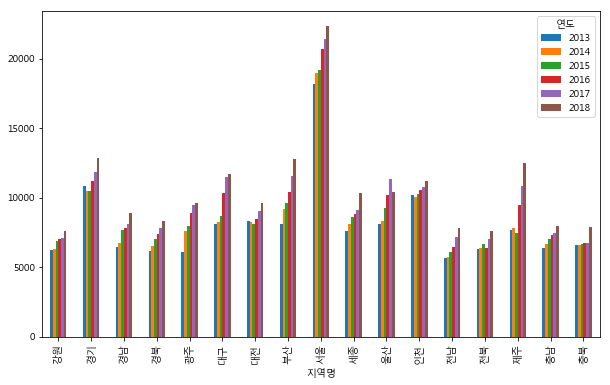

In [38]:
%matplotlib inline
from matplotlib import font_manager, rc
path = 'c:/windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)



df = df_2013_2018.pivot_table(values = '평당 분양가격', index="지역명", columns = '연도', aggfunc = 'mean')
df.values.shape

df_bar = pd.DataFrame(df.values, index = df.index, columns = df.columns)
df_bar.plot(kind = 'bar', figsize = (10, 6))
df_bar

df_2013_2018.groupby('지역명').sum()